In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

print (tf.__version__)

1.13.1


In [2]:
img_width = 64
img_height = 64

In [3]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [6]:
train_data_generator = datagen.flow_from_directory(directory='/Users/stefanflorin/Downloads/cell_images/',
                                                  target_size=(img_width, img_height),
                                                  class_mode = 'binary',
                                                  batch_size=16,
                                                  subset = 'training')

Found 22048 images belonging to 2 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory = '/Users/stefanflorin/Downloads/cell_images/',
                                                       target_size = (img_width, img_height),
                                                       class_mode = 'binary',
                                                       batch_size=16,
                                                       subset = 'validation')

Found 5510 images belonging to 2 classes.


In [8]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# CNN Model Building

In [9]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
__________

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit_generator(generator=train_data_generator,
                             steps_per_epoch=len(train_data_generator),
                             epochs=5,
                             validation_data=validation_data_generator,
                             validation_steps=len(validation_data_generator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1378/1378 [==============================] - 93s 68ms/step - loss: 0.4596 - acc: 0.7719 - val_loss: 0.2124 - val_acc: 0.9276
Epoch 2/5
1378/1378 [==============================] - 81s 59ms/step - loss: 0.2178 - acc: 0.9253 - val_loss: 0.1801 - val_acc: 0.9359
Epoch 3/5
1378/1378 [==============================] - 89s 65ms/step - loss: 0.1926 - acc: 0.9353 - val_loss: 0.1811 - val_acc: 0.9399
Epoch 4/5
1378/1378 [==============================] - 61s 45ms/step - loss: 0.1817 - acc: 0.9399 - val_loss: 0.1758 - val_acc: 0.9397
Epoch 5/5
1378/1378 [==============================] - 61s 44ms/step - loss: 0.1699 - acc: 0.9428 - val_loss: 0.1843 - val_acc: 0.9309


In [32]:
history.history

{'loss': [0.4596395064064224,
  0.21777000778499336,
  0.19258511825147015,
  0.18168934479866755,
  0.16990156345818253],
 'acc': [0.77190673, 0.9253447, 0.9352776, 0.9398585, 0.9428066],
 'val_loss': [0.21236190495715626,
  0.18013715572871158,
  0.18105048493522666,
  0.17583606167817895,
  0.1843453557594963],
 'val_acc': [0.9275862, 0.93593466, 0.9399274, 0.9397459, 0.930853]}

In [35]:

    
def plot_learningCurve(history, epoch):
    
      # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['acc'])
    plt.plot(epoch_range, history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

  # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
  
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

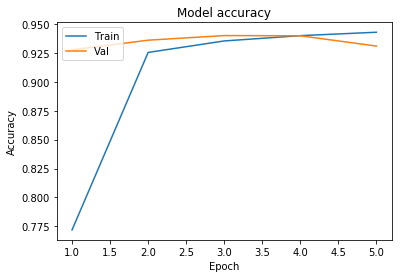

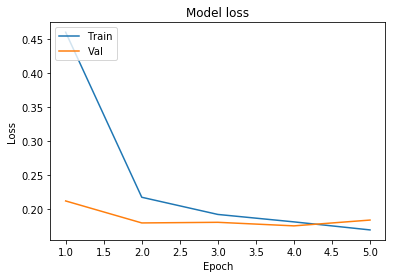

In [36]:
plot_learningCurve(history, 5)